# Maximum Likelihood Estimation (MACS 30100)

## 1. General characterization of a model and data generating process
Each of the model estimation approaches that we will discuss in this section on Maximum Likelihood estimation (MLE) and in subsequent sections on generalized method of moments (GMM) and simulated method of moments (SMM) involves choosing values of the parameters of a model to make the model match some number of properties of the data. Define a model or a data generating process (DGP) as:

$$ F(x_t, z_t|\theta) = 0 $$

In reality, a model could also include inequalities representing constraints. But this is sufficient for our discussion. The goal of maximum likelihood estimation (MLE) is to choose the parameter vector of the model $\theta$ to maximize the likelihood of seeing the data produced by the model $(x_t, z_t)$.

An example of an economic model that follows the more general definition of $F(x_t, z_t|\theta) = 0$ is Brock and Mirman (1972). This model has multiple nonlinear dynamic equations, 7 parameters, 1 exogenous time series of variables, and about 5 endogenous time series of variables. A maximum likelihood model with

Another example of a model is a statistical distribution [e.g., the normal distribution $N(\mu, \sigma)$].

$$ Pr(x|\theta) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x - \mu)^2}{2\sigma^2}} $$

The probability of drawing value $x_i$ from the distribution $f(x|\theta)$ is $f(x_i|\theta)$. The probability of drawing the following vector of two observations $(x_1,x_2)$ from the distribution $f(x|\theta)$ is $f(x_1|\theta)\times f(x_2|\theta)$. We define the likelihood function of $N$ draws $(x_1,x_2,...x_N)$ from a model or distribution $f(x|\theta)$ as $\mathcal{L}$.

$$ \mathcal{L}(x_1,x_2,...x_N|\theta) \equiv \prod_{i=1}^N f(x_i|\theta) $$

Because it can be numerically difficult to maximize a product of percentages (one small value can make dominate the entire product), it is almost always easier to use the log likelihood function $\ln(\mathcal{L})$.

$$ \ln\Bigl(\mathcal{L}(x_1,x_2,...x_N|\theta)\Bigr) \equiv \sum_{i=1}^N \ln\Bigl(f(x_i|\theta)\Bigr) $$

The maximum likelihood estimate $\hat{\theta}_{MLE}$ is the following:

$$ \hat{\theta}_{MLE} = \theta:\quad \max_\theta \: \ln\mathcal{L} = \sum_{i=1}^N\ln\Bigl(f(x_i|\theta)\Bigr) $$

## 2. Comparisons of distributions and data

Import some data from the total points earned by all the students in two sections of my intermediate macroeconomics class for undergraduates at my previous University in a certain year (two semesters).

In [3]:
import numpy as np
import scipy.stats as sts

pts = np.loadtxt('Econ381totpts.txt')
pts
len(pts)

161

Let's create a histogram of the data.

<IPython.core.display.Javascript object>


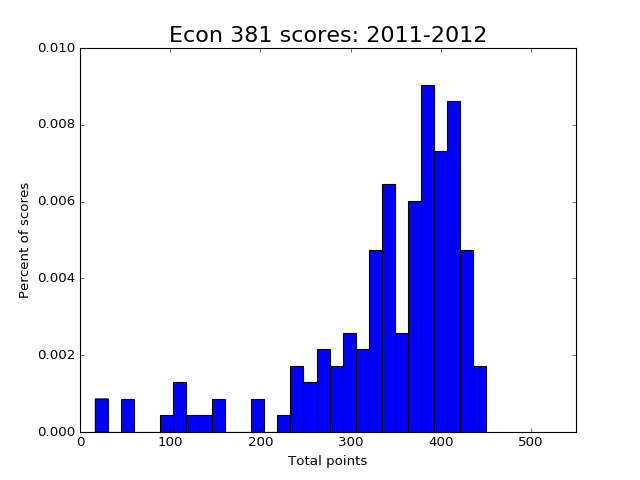

(0, 550)

In [6]:
import matplotlib.pyplot as plt
# This next command is specifically for Jupyter Notebook
%matplotlib notebook
count, bins, ignored = plt.hist(pts, 30, normed=True)
plt.title('Econ 381 scores: 2011-2012', fontsize=20)
plt.xlabel('Total points')
plt.ylabel('Percent of scores')
plt.xlim([0, 550])  # This gives the xmin and xmax to be plotted"

Now let's create a distribution around these data that we think fits it well.

<IPython.core.display.Javascript object>


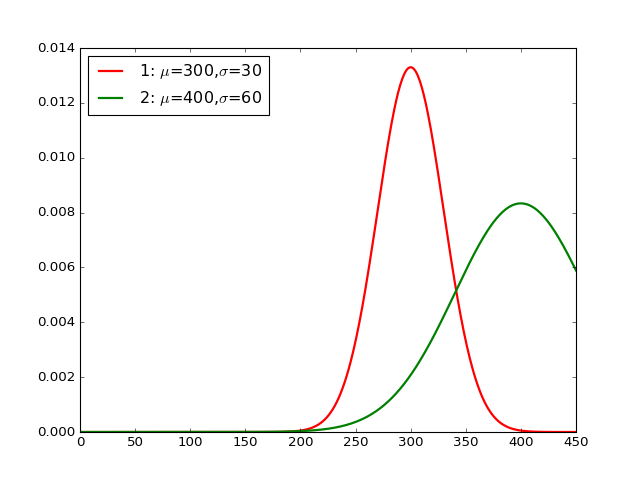

In [7]:
# Define function that generates values of a normal pdf
def norm_pdf(xvals, mu, sigma, cutoff):
    '''
    --------------------------------------------------------------------
    Generate pdf values from the normal pdf with mean mu and standard
    deviation sigma. If the cutoff is given, then the PDF values are
    inflated upward to reflect the zero probability on values above the
    cutoff. If there is no cutoff given, this function does the same
    thing as sp.stats.norm.pdf(x, loc=mu, scale=sigma).
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the normally distributed random
             variable
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None
    
    OBJECTS CREATED WITHIN FUNCTION:
    prob_notcut = scalar 
    pdf_vals = (N,) vector, normal PDF values for mu and sigma
               corresponding to xvals data
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: pdf_vals
    --------------------------------------------------------------------
    '''
    if cutoff == 'None':
        prob_notcut = 1.0
    else:
        prob_notcut = sts.norm.cdf(cutoff, loc=mu, scale=sigma)
            
    pdf_vals    = ((1/(sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (xvals - mu)**2 / (2 * sigma**2))) /
                    prob_notcut)
    
    return pdf_vals

dist_pts = np.linspace(0, 450, 500)
mu_1 = 300
sig_1 = 30
plt.plot(dist_pts, norm_pdf(dist_pts, mu_1, sig_1, 450),
         linewidth=2, color='r', label='1: $\mu$=300,$\sigma$=30')
plt.legend(loc='upper left')

mu_2 = 400
sig_2 = 60
plt.plot(dist_pts, norm_pdf(dist_pts, mu_2, sig_2, 450),
         linewidth=2, color='g', label='2: $\mu$=400,$\sigma$=60')
plt.legend(loc='upper left')


Which distribution will have the biggest log likelihood function? Why?

Let's compute the log likelihood function for this data for both of these distributions.

In [8]:
# Define log likelihood function for the normal distribution
def log_lik_norm(xvals, mu, sigma, cutoff):
    '''
    --------------------------------------------------------------------
    Compute the log likelihood function for data xvals given normal
    distribution parameters mu and sigma.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the normally distributed random
             variable
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        norm_pdf()
    
    OBJECTS CREATED WITHIN FUNCTION:
    pdf_vals    = (N,) vector, normal PDF values for mu and sigma
                  corresponding to xvals data
    ln_pdf_vals = (N,) vector, natural logarithm of normal PDF values
                  for mu and sigma corresponding to xvals data
    log_lik_val = scalar, value of the log likelihood function
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: log_lik_val
    --------------------------------------------------------------------
    '''
    pdf_vals = norm_pdf(xvals, mu, sigma, cutoff)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

print('Log-likelihood 1: ', log_lik_norm(pts, mu_1, sig_1, 450))
print('Log-likelihood 2: ', log_lik_norm(pts, mu_2, sig_2, 450))

Log-likelihood 1:  -1552.80745073
Log-likelihood 2:  -1021.24571146


Why is the log likelihood value negative?

How do we estimate $\mu$ and $\sigma$ by maximum likelihood? What values of $\mu$ and $\sigma$ will maximize the likelihood function?
$$(\hat{\mu},\hat{\sigma})_{MLE} = (\mu, \sigma):\quad argmax_{\mu,\sigma}\:\mathcal{L}=\sum_{i=1}^N\ln\Bigl(f(x_i|\mu,\sigma)\Bigr)$$

## 3. How to set up a maximization (minimization) problem in Python
A minimizer is a function that chooses a single value or a vector of values to minimize the result of a scalar-valued function of that vector. Any maximization problem can be restated as a minimization problem. Because minimization problems are more numerically stable and well defined, most numerical optimizers are stated as minimizers. The [scipy.optimize](https://docs.scipy.org/doc/scipy-0.18.1/reference/optimize.html) library has many types of root-finders and minimizers. For our maximum likelihood estimation problems, we will use the [scipy.optimize.minimize()](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) function.

### 3.1. The criterion function
The first step is to write a function that takes two inputs and returns a scalar value.
1. The first input is either a scalar or a vector of values (the object `params` in the function `crit()` below). This object is the value or values being chosen to minimize the criterion function.
2. The second object is Python's variable length input objects `*args`, which is a tuple of variable length positional arguments. As you will see in the `minimize()` function, all the arguments must be passed into the criterion function in one tuple.
3. Lastly, you must make sure that the scalar criterion value that the function returns is the value of the problem stated as a minimization problem and not a maximization problem. In this case of maximum likelihood estimation, you want the negative of the log likelihood function.

In [10]:
def crit(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the negative of the log likelihood function
    given parameters and data. This is the minimization problem version
    of the maximum likelihood optimization problem
    --------------------------------------------------------------------
    INPUTS:
    params = (2,) vector, ([mu, sigma])
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    args   = length 2 tuple, (xvals, cutoff)
    xvals  = (N,) vector, values of the normally distributed random
             variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        log_lik_norm()
    
    OBJECTS CREATED WITHIN FUNCTION:
    log_lik_val = scalar, value of the log likelihood function
    neg_log_lik_val = scalar, negative of log_lik_val
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: neg_log_lik_val
    --------------------------------------------------------------------
    '''
    mu, sigma = params
    xvals, cutoff = args
    log_lik_val = log_lik_norm(xvals, mu, sigma, cutoff)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

### 3.2. The minimize() function
The `minimize()` function is shorthand for `scipy.optimize.minimize()`. This function returns a dictionary of objects including the solution to the optimization problem and whether the problem actually solved. The `minimize` function has three mandatory arguments, plus a lot of options. You can experiment with the options on the [`minimize()` documentation page](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize).
1. The first argument of the minimize function is the criterion function (`crit()` in this example) from which the `minimize()` function will test values of the parameters in searching for the minimum value.
2. The second argument is an initial guess for the values of the parameters that minimize the criterion function `crit()`.
3. The third argument is the tuple of all the objects needed to solve the criterion function in `crit()`.

In [15]:
import scipy.optimize as opt

mu_init = 400  # mu_2
sig_init = 70  # sig_2
params_init = np.array([mu_init, sig_init])
mle_args = (pts, 450.0)
results = opt.minimize(crit, params_init, args=(mle_args))
mu_MLE, sig_MLE = results.x
print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)

mu_MLE= 558.361993002  sig_MLE= 176.706110569


In [12]:
results

      fun: 911.1245098593138
 hess_inv: array([[ 11380.72875537,   3528.43301364],
       [  3528.43301364,   1172.7394279 ]])
      jac: array([  0.00000000e+00,  -7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 104
      nit: 24
     njev: 26
   status: 0
  success: True
        x: array([ 558.361993  ,  176.70611057])

<IPython.core.display.Javascript object>


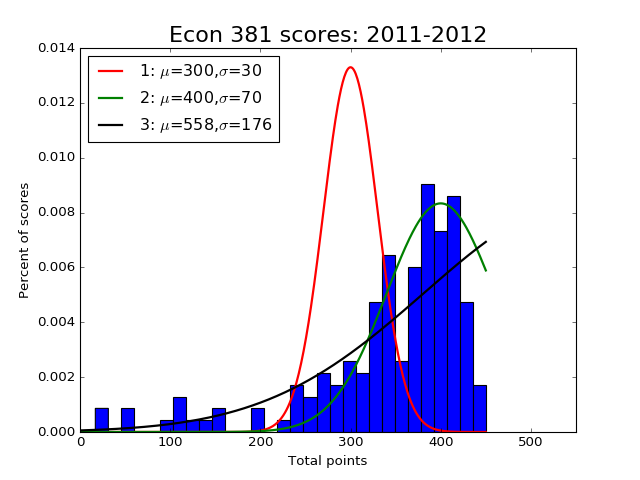

In [13]:
# Plot the histogram of the data
count, bins, ignored = plt.hist(pts, 30, normed=True)
plt.title('Econ 381 scores: 2011-2012', fontsize=20)
plt.xlabel('Total points')
plt.ylabel('Percent of scores')
plt.xlim([0, 550])  # This gives the xmin and xmax to be plotted"

# Plot the two test distributions from before
plt.plot(dist_pts, norm_pdf(dist_pts, mu_1, sig_1, 450),
         linewidth=2, color='r', label='1: $\mu$=300,$\sigma$=30')
plt.legend(loc='upper left')

plt.plot(dist_pts, norm_pdf(dist_pts, mu_2, sig_2, 450),
         linewidth=2, color='g', label='2: $\mu$=400,$\sigma$=70')
plt.legend(loc='upper left')

# Plot the MLE estimated distribution
plt.plot(dist_pts, norm_pdf(dist_pts, mu_MLE, sig_MLE, 450),
         linewidth=2, color='k', label='3: $\mu$=558,$\sigma$=176')
plt.legend(loc='upper left')

In [ ]:
print('Log-likelihood 1: ', log_lik_norm(pts, mu_1, sig_1, 450))
print('Log-likelihood 2: ', log_lik_norm(pts, mu_2, sig_2, 450))
print('MLE log-likelihood 3: ', log_lik_norm(pts, mu_MLE, sig_MLE, 450))

Let's see if this likelihood function is well behaved by looking at a grid over possible values of $\mu$ and $\sigma$ for the given data.

In [ ]:
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
cmap1 = matplotlib.cm.get_cmap('summer')

mu_vals = np.linspace(540, 590, 50)
sig_vals = np.linspace(170, 180, 50)
lnlik_vals = np.zeros((50, 50))
for mu_ind in range(50):
    for sig_ind in range(50):
        lnlik_vals[mu_ind, sig_ind] = log_lik_norm(pts, mu_vals[mu_ind],
                                                   sig_vals[sig_ind], 450)

mu_mesh, sig_mesh = np.meshgrid(mu_vals, sig_vals)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(sig_mesh, mu_mesh, lnlik_vals, rstride=8,
                cstride=1, cmap=cmap1)
ax.set_title('Log likelihood for values of mu and sigma')
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$\mu$')
ax.set_zlabel(r'log likelihood')

## 4. The variance-covariance matrix of ML estimates
Davidson and MacKinnon (2004, Sec. 10.4) have a great discussion four different estimators for the variance-covariance matrix of the maximum likelihood estimates. That is, we want to know what is the variance or uncertainty of our estimates for $\mu$ and $\sigma$, and how are those two estimates correlated. The four most common estimators for the VCV matrix of a maximum likelihood estimate are:
1. Empirical Hessian estimator (H)
2. Information matrix estimator (I)
3. Outer-product-of-the-gradient estimator (OPG)
4. Sandwich estimator (S)

All of these estimators of the VCV matrix intuitively measure how flat the likelihood function is at the estimated parameter values in the dimension of each estimated parameter. The Hessian is a matrix of second derivatives of the log likelihood function with respect to the parameters being chosen. The Hessian matrix therefore captures information about how the slope of the log likelihood function is changing in each direction.The empirical Hessian estimator is the most commonly used. One really nice property of Python's `minimize()` function is that one of the result objects is the inverse Hessian.

$$ \hat{VAR}_H(\hat{\theta}) =-H^{-1}(\hat{\theta}) $$

In [14]:
results
vcv_mle = results.hess_inv
stderr_mu_mle = np.sqrt(vcv_mle[0,0])
stderr_sig_mle = np.sqrt(vcv_mle[1,1])
print('VCV(MLE) = ', vcv_mle)
print('Standard error for mu estimate = ', stderr_mu_mle)
print('Standard error for sigma estimate = ', stderr_sig_mle)

VCV(MLE) =  [[ 11380.72875537   3528.43301364]
 [  3528.43301364   1172.7394279 ]]
Standard error for mu estimate =  106.680498477
Standard error for sigma estimate =  34.2452832943


## 5. Hypothesis testing
Can we reject the hypothesis that $\mu=400$ and $\sigma=70$ with 95% confidence? How do you answer that question? What does the figure tell us about this answer? In this section, we will discuss four ways to perform hypothesis testing.
1. Two standard errors (back of the envelope, approximation)
2. Likelihood ratio test
3. Wald test
4. Lagrange multiplier test

Davidson and MacKinnon (2004, Sec. 10.5) have a more detailed discussion of methods 2, 3, and 4.

### 5.1. Back of the envelope, two standard errors (assuming normality)
A really quick approach to hypothesis testing is to see if your hypothesized values are within two standard errors of the estimated values. This approach is not completely correct because estimates in the log likelihood function are not symmetrically distributed. But it is at least a first approximation. 

In [ ]:
lb_mu_95pctci = mu_MLE - 2 * stderr_mu_mle
print('mu_2=', mu_2, ', lower bound 95% conf. int.=', lb_mu_95pctci)

lb_sig_95pctci = sig_MLE - 2 * stderr_sig_mle
print('sig_2=', sig_2, ', lower bound 95% conf. int.=', lb_sig_95pctci)

### 5.2. Likelihood ratio test
The likelihood ratio test is the simplest and, therefore, the most common of the three more precise methods (2, 3, and 4). Let your maximum likelihood estimation have $p$ parameters (the vector $\theta$ has $p$ elements), let $\hat{\theta}_{MLE}$ be the maximum likelihood estimate, and let $\tilde{\theta}$ be your hypothesized values of the parameters. The likelihood ratio test statistic is the following.

$$ LR(\tilde{\theta}|\hat{\theta}_{MLE}) = 2\Bigl(\ln\ell(\hat{\theta}_{MLE}) - \ln\ell(\tilde{\theta})\Bigr) \sim \chi^2(p) $$

Note that this is a joint test of the likelihood of $H_0: \mu_0, \sigma_0$. The value of the $\chi^2(p)$ tells you the probability that the data could have been taken from the hypothesized distribution or model.

In [ ]:
log_lik_h0 = log_lik_norm(pts, mu_2, sig_2, 450)
# log_lik_h0 = log_lik_norm(pts, 555, 176, 450)
log_lik_mle = log_lik_norm(pts, mu_MLE, sig_MLE, 450)
LR_val = 2 * (log_lik_mle - log_lik_h0)
chi2_ho = sts.chi2.pdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom = ', chi2_ho)

## 6. References
* Brock, William A. and Leonard J. Mirman, "Optimal Economic Growth and Uncertainty: The Discounted Case," *Journal of Economic Theory*, 4:3, pp. 479-513 (June 1972).
* Davidson, Russell and James G. MacKinnon, *Econometric Theory and Methods*, Oxford University Press (2004).